### Import Libraries

In [1]:
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import sys, os
import warnings
warnings.simplefilter(action='ignore')

###  Upload Data Dasar: findata_challenge_train.csv

In [2]:
train = pd.read_csv('findata_challenge_train.csv')

In [3]:
train.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x116,x117,x118,x119,x120,x121,x122,x123,x124,y
0,0.067563,-2.172492,-1.713774,-0.146854,-0.685219,-0.933838,4.0,2.0,-4.476051,-1.472306,...,4.607926,52.0,1.0,0.773809,0.766531,6.307142,9.074515,-2.694049,0.330964,0
1,0.099622,0.584803,-6.089758,-0.252186,-0.334912,-4.671281,4.0,2.0,-0.387076,-0.664552,...,15.889763,53.0,1.0,7.065852,0.994304,-0.028411,-21.472850,5.626095,1.293455,0
2,0.648421,3.881137,0.961359,0.217361,-1.471850,-0.975352,5.0,1.0,-0.850146,-4.011487,...,13.770410,53.0,1.0,-8.598553,-2.958302,-12.784030,-36.855873,0.356093,1.499790,0
3,0.005775,-2.726153,2.891378,-0.038325,2.280847,1.761478,3.0,3.0,9.116188,-4.610151,...,5.904901,50.0,1.0,8.194975,-7.798308,10.910515,15.226094,-10.440813,-0.735116,0
4,0.044396,2.803576,-1.923381,-0.116657,-1.574199,6.098627,3.0,1.0,-13.956141,13.785099,...,-14.603703,47.0,0.0,2.330789,-8.249825,-12.680490,40.192302,-5.037065,1.679262,1


#### Data Nasabah: x0 - x124 (125 kolom): Merupakan data nasabah yang telah dinormalisasi dan dirahasiakan nama kolomnya
#### Variabel target: y - Apakah nasabah akan chrun? (1: iya, 0: tidak)
#### Note: terdapat beberapa Missing Value pada data

## EDA (Exploratory Data Analysis)

In [4]:
train.shape

(100000, 126)

In [5]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.columns

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       ...
       'x116', 'x117', 'x118', 'x119', 'x120', 'x121', 'x122', 'x123', 'x124',
       'y'],
      dtype='object', length=121)

In [6]:
cat_features = train.select_dtypes(include=object)
cat_features.columns

Index(['x21', 'x79', 'x89', 'x108', 'x112'], dtype='object')

#### Berdasarkan pembagian jenis data, terdapat 121 kolom data dengan jenis data numerical dan 5 kolom jenis data categorical 
#### Apabila kita melakukan analisa lebih jauh, terdapat 2 kolom berupa tahun, yaitu X80 dan X93. Dalam hal ini penulis mengkateogorikan tahun sebagai jenis data categorical

In [7]:
## Converting Data Type: X80, X93

train['x80'] = train['x80'].astype(str)
train['x93'] = train['x93'].astype(str)

In [8]:
train_cat = train[['x21','x79','x80','x89','x93','x108','x112']]

In [9]:
for col in train_cat:
    print(train_cat[col].unique())

['Jun' 'Jul' 'May' 'Apr' 'Aug' 'Sep' 'Jan' 'Oct' 'Mar' nan 'Feb' 'Nov'
 'Dec']
['Laki-laki' 'Perempuan' nan]
['2019.0' '2018.0' '2017.0' '2020.0' '2016.0' 'nan' '2021.0' '2015.0']
['Jambi' 'Sumatera Barat' 'Sumatera Selatan' 'Kalimantan Utara'
 'Kalimantan Barat' 'Kalimantan Selatan' 'Bangka Belitung'
 'Sumatera Utara' 'Gorontalo' 'Sulawesi Barat' 'Kalimantan Tengah'
 'Kalimantan Timur' 'Sulawesi Utara' 'Jawa Timur' 'Sulawesi Tenggara'
 'Bengkulu' 'Sulawesi Tengah' 'Jawa Tengah' nan 'Jawa Barat' 'Bali' 'NTB'
 'DKI Jakarta' 'DI Yogyakarta' 'Banten' 'NTT' 'Maluku Utara' 'Maluku']
['2010.0' '2009.0' '2014.0' '2011.0' '2012.0' '2007.0' '2005.0' '2008.0'
 '2013.0' '2016.0' '2006.0' '2015.0' '2017.0' '2004.0' '2019.0' '2003.0'
 'nan' '2002.0' '2018.0' '2000.0' '2001.0' '2020.0']
['SMP' 'SD' 'SMA/SMK' 'S1/S2/S3' 'Tidak sekolah' nan]
['May' 'Jun' 'Sep' 'Jul' 'Aug' 'Oct' 'Apr' 'Mar' 'Nov' nan 'Feb' 'Dec'
 'Jan']


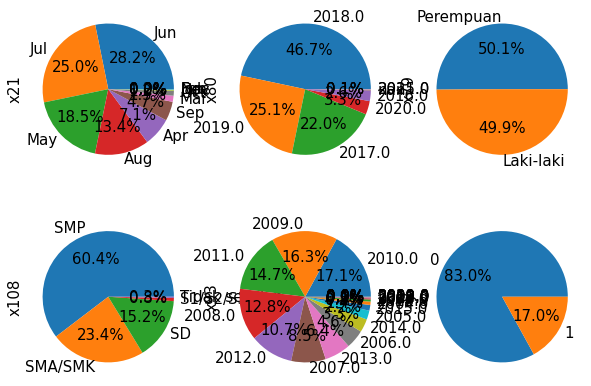

In [10]:
def srt_dist(df=train, cols=train[['x21','x80','x79','x108','x93','y']]):
    fig, axes = plt.subplots(2, 3, squeeze=True)
    axes = axes.flatten()
    
    for i, j in zip(cols, axes):
        (df[i].value_counts()*100.0/len(df)).plot.pie(autopct='%.1f%%',figsize=(10,7), fontsize=15, ax=j)
        j.yaxis.label.set_size(15)
srt_dist()

### Berdasarkan ratio persebaran data jenis categorical, dapat dilihat bahwa Variabel target: y memiliki proporsional data yang tidak seimbang. Hal ini menunjukkan kondisi Data Imbalance.  

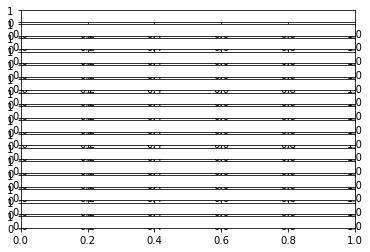

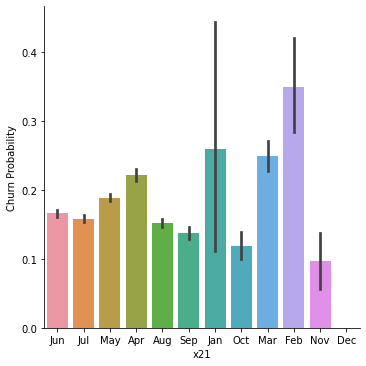

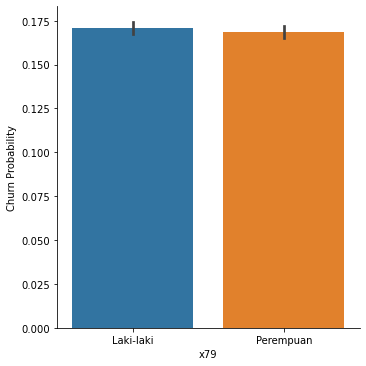

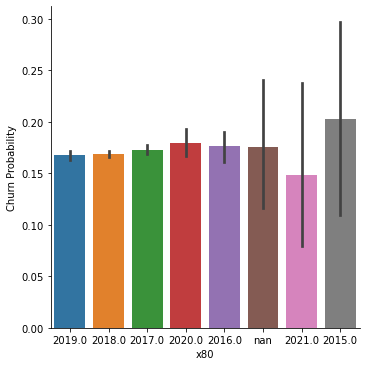

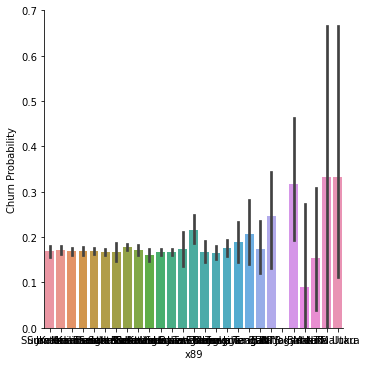

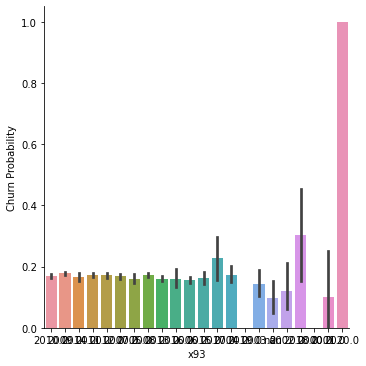

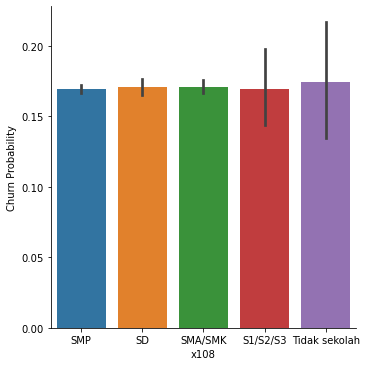

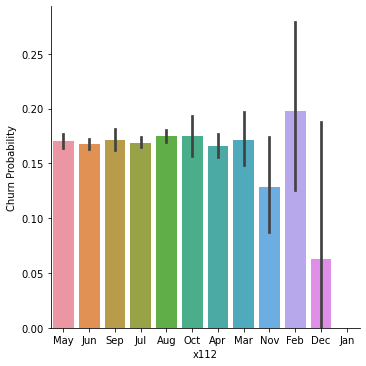

In [11]:
cat_feats=['x21','x79','x80','x89','x93','x108','x112']
fig,axes = plt.subplots(16)
axes = axes.flatten()

for i, j in zip(cat_feats, axes):

    sortd = train.groupby([i])['y'].median().sort_values(ascending=False)
    j=sns.catplot(x=i,
                y='y',
                data=train,
                kind='bar')
    j.set_ylabels("Churn Probability")


In [12]:
correlation = train.corr()
print(correlation['y'].abs().sort_values(ascending = False),'\n')

y       1.000000
x17     0.136983
x57     0.128242
x41     0.120998
x60     0.113804
          ...   
x33     0.000299
x69     0.000197
x14     0.000172
x11     0.000157
x100    0.000024
Name: y, Length: 119, dtype: float64 



In [13]:
cor_a = pd.DataFrame(correlation['y'].abs().sort_values(ascending = False))
cor_a.head(60)

,y
y,1.000000
x17,0.136983
x57,0.128242
x41,0.120998
x60,0.113804
x106,0.113577
x44,0.097781
x105,0.094995
x92,0.085921
x67,0.083999


In [14]:
cor_a.tail(20)

,y
x110,0.001184
x87,0.001142
x95,0.001024
x90,0.000989
x36,0.000961
x85,0.000863
x99,0.000828
x34,0.000735
x5,0.000705
x43,0.000690


### Berdasarkan persebaran nilai korelasi antara seluruh variabel terhadap Variabel target: y, menunjukkan nilai korelasi yang rendah.

In [15]:
train.isna().sum()

x0      123
x1      131
x2      124
x3      115
x4      137
       ... 
x121    129
x122    127
x123    130
x124    123
y         0
Length: 126, dtype: int64

In [16]:
train2 = train.dropna()

In [17]:
print(train.shape)
print(train2.shape)

(100000, 126)
(84238, 126)


### Terdapat sejumlah data dengan kondisi empty (N/A), dalam hal ini penulis melakukan penghapusan terhadap seluruh kondisi data yang tidak lengkap.

In [18]:
train3 = train2.drop(['x89'], axis=1)

### X89 merupakan data categorical spasial provinsi nasabah. Dalam hal ini penulis menghapus jenis data dimaksud karena dinilai tidak memiliki korelasi yang cukup signifikan terhadap output dan menyumbang proporsi kategori data yang cukup besar.

## Feature Engineering

### Dalam tahap Feature Engineering, penulis menggunakan metode Dummy Variabel untuk mengubah jenis data cetegorical menjadi numerical.

In [19]:
train_dum = pd.get_dummies(train3)
train_dum.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x112_Dec,x112_Feb,x112_Jan,x112_Jul,x112_Jun,x112_Mar,x112_May,x112_Nov,x112_Oct,x112_Sep
0,0.067563,-2.172492,-1.713774,-0.146854,-0.685219,-0.933838,4.0,2.0,-4.476051,-1.472306,...,0,0,0,0,0,0,1,0,0,0
2,0.648421,3.881137,0.961359,0.217361,-1.471850,-0.975352,5.0,1.0,-0.850146,-4.011487,...,0,0,0,0,1,0,0,0,0,0
3,0.005775,-2.726153,2.891378,-0.038325,2.280847,1.761478,3.0,3.0,9.116188,-4.610151,...,0,0,0,0,0,0,0,0,0,1
4,0.044396,2.803576,-1.923381,-0.116657,-1.574199,6.098627,3.0,1.0,-13.956141,13.785099,...,0,0,0,0,1,0,0,0,0,0
5,-0.462368,2.526347,0.920240,-0.020618,-5.179910,-3.853827,4.0,3.0,8.257549,-6.077966,...,0,0,0,1,0,0,0,0,0,0


In [20]:
print(train.shape)
print(train3.shape)
print(train_dum.shape)

(100000, 126)
(84238, 125)
(84238, 180)


In [21]:
y = train_dum['y']
X = train_dum.drop(['y'], axis=1)

In [22]:
len(X), len(y)

(84238, 84238)

### Imbalance Data: Dalam hal kondisi rasio total data Variabel target (y) yang tidak seimbang dari jumlah data keseluruhan, penulis menggunakan metode RandomOverSampler.

In [23]:
### Random Sampling - IMBALANCED DATA

from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.datasets import make_classification

In [24]:
print(Counter(y))

Counter({0: 69918, 1: 14320})


In [25]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

In [26]:
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

In [27]:
# summarize class distribution
print(Counter(y_over))

Counter({0: 69918, 1: 69918})


In [28]:
### RESULT
#X_over, y_over ---> Output from oversampling minority

len(X_over), len(y_over)

(139836, 139836)

## Modelling

### Pembagian dataset menjadi training/test dengan ratio: 75:25
### Metode pembagian data menggunakan konsep Cross-validation: Stratified Shuffle Split

In [29]:
from sklearn.model_selection import train_test_split
## TRAIN/TEST SPLIT - CROSS VALIDAION = Stratify

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.25, stratify=y_over, random_state=2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((104877, 179), (34959, 179), (104877,), (34959,))

### Mengaktifkan beberapa library: JcopML, Pipeline
#### Dalam proses modelling ini penulis menggunakan library tersebut untuk memudahkan proses pengolahan data yang digunakan dalam proses trial/error.

In [31]:
### Activation Library: JcopML, Pipeline

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [32]:
print(X_train.columns.tolist())

['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x90', 'x91', 'x92', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99', 'x100', 'x101', 'x102', 'x103', 'x104', 'x105', 'x106', 'x107', 'x109', 'x110', 'x111', 'x113', 'x114', 'x115', 'x116', 'x117', 'x118', 'x119', 'x120', 'x121', 'x122', 'x123', 'x124', 'x21_Apr', 'x21_Aug', 'x21_Dec', 'x21_Feb', 'x21_Jan', 'x21_Jul', 'x21_Jun', 'x21_Mar', 'x21_May', 'x21_Nov', 'x21_Oct', 'x21_Sep', 'x79_Laki-laki', 'x79_Peremp

In [33]:
preprocessor = ColumnTransformer([
('numeric', num_pipe(), X_train.columns.tolist())
])

### Setelah melakukan beberapa percobaan, penulis menentukan metode Supervised-learning classification yang paling optimal untuk digunakan yaitu Random Forest Classifier.

In [34]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier(n_jobs=-1, random_state=42))
])

In [35]:
from sklearn.model_selection import RandomizedSearchCV

In [37]:
from jcopml.tuning import random_search_params as rsp

In [38]:
import time

In [39]:
%%time
####  Implement -- RANDOM SEARCH CV

model = RandomizedSearchCV(pipeline, rsp.rf_params, cv=3, n_iter=30, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))


Fitting 3 folds for each of 30 candidates, totalling 90 fits
{'algo__max_depth': 48, 'algo__max_features': 0.8219772826786358, 'algo__min_samples_leaf': 1, 'algo__n_estimators': 188}
1.0 0.9640435939243113 0.9856975313939186
Wall time: 2h 27min 42s


## Model Evaluation

In [39]:
from jcopml.plot import plot_classification_report, plot_confusion_matrix, plot_roc_curve, plot_pr_curve

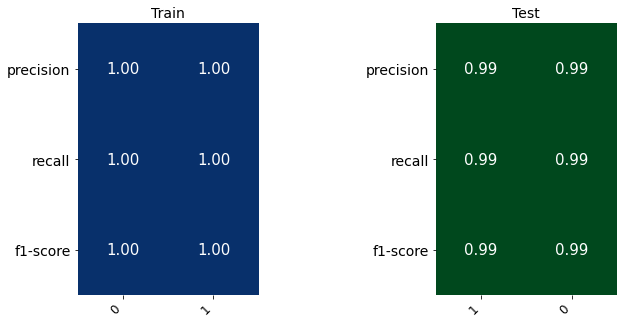

In [41]:
plot_classification_report(X_train, y_train, X_test, y_test, model)

In [42]:
plot_classification_report(X_train, y_train, X_test, y_test, model, report=True)

Train report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52438
           1       1.00      1.00      1.00     52439

    accuracy                           1.00    104877
   macro avg       1.00      1.00      1.00    104877
weighted avg       1.00      1.00      1.00    104877


Test report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     17480
           1       0.99      0.99      0.99     17479

    accuracy                           0.99     34959
   macro avg       0.99      0.99      0.99     34959
weighted avg       0.99      0.99      0.99     34959



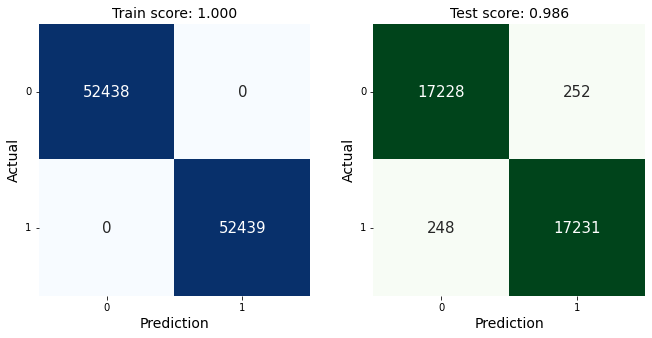

In [43]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)

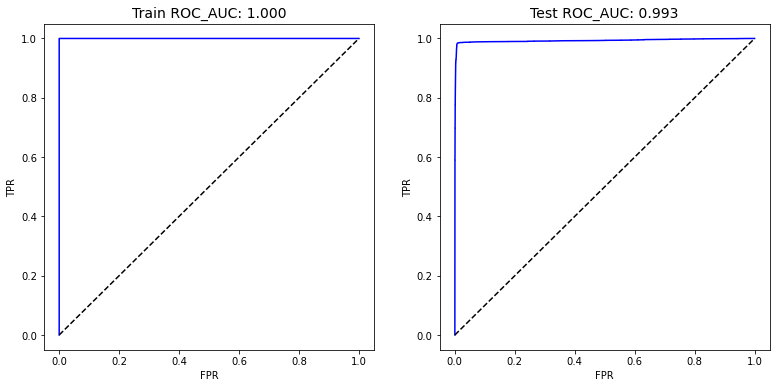

In [44]:
plot_roc_curve(X_train, y_train, X_test, y_test, model)

## Parameter Tuning

### Dalam tahap Tuning ini, penulis menggunakan metode GeneticSelectionCV dari Library Scikit.learn.
### Metode ini digunakan untuk Feature Selection, mengeliminasi sejumlah feature yang digunakan dalam proses pemodelan dengan target: MENINGKATKAN KECEPATAN PEMODELAN.

In [40]:
##### TUNING
#!pip install sklearn-genetic
from genetic_selection import GeneticSelectionCV

In [41]:
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier

In [42]:
estimator = RandomForestClassifier()

In [45]:
model = GeneticSelectionCV(estimator, cv=5, verbose=0, scoring="accuracy", max_features=50, n_population=100, crossover_proba=0.5, mutation_proba=0.2, n_generations=50, crossover_independent_proba=0.5, mutation_independent_proba=0.04, tournament_size=3, n_gen_no_change=10, caching=True, n_jobs=-1)

In [46]:
model

GeneticSelectionCV(caching=True, crossover_independent_proba=0.5, cv=5,
                   estimator=RandomForestClassifier(), max_features=50,
                   mutation_independent_proba=0.04, n_gen_no_change=10,
                   n_generations=50, n_jobs=-1, n_population=100,
                   scoring='accuracy')

### NOTE: Proses pengolahan data Feature Selection menggunakan Tuning = 15h 28min 14s

In [47]:
%%time
####  Implement -- GeneticSelectionCV

#model = model.fit(X_train, y_train)
#print('Features:', X_train.columns[model.support_])


Features: Index(['x4', 'x10', 'x13', 'x15', 'x25', 'x28', 'x29', 'x32', 'x35', 'x36',
       'x40', 'x46', 'x50', 'x53', 'x55', 'x59', 'x61', 'x62', 'x64', 'x66',
       'x68', 'x73', 'x75', 'x78', 'x86', 'x91', 'x96', 'x99', 'x102', 'x103',
       'x106', 'x109', 'x119', 'x122', 'x123', 'x21_Dec', 'x21_Jan', 'x21_Nov',
       'x80_2018.0', 'x93_2002.0', 'x93_2008.0', 'x93_2016.0', 'x108_SD',
       'x108_SMA/SMK', 'x108_Tidak sekolah', 'x112_Nov'],
      dtype='object')


AttributeError: 'GeneticSelectionCV' object has no attribute 'best_params_'

In [48]:
print('Features:', X_train.columns[model.support_])

Features: Index(['x4', 'x10', 'x13', 'x15', 'x25', 'x28', 'x29', 'x32', 'x35', 'x36',
       'x40', 'x46', 'x50', 'x53', 'x55', 'x59', 'x61', 'x62', 'x64', 'x66',
       'x68', 'x73', 'x75', 'x78', 'x86', 'x91', 'x96', 'x99', 'x102', 'x103',
       'x106', 'x109', 'x119', 'x122', 'x123', 'x21_Dec', 'x21_Jan', 'x21_Nov',
       'x80_2018.0', 'x93_2002.0', 'x93_2008.0', 'x93_2016.0', 'x108_SD',
       'x108_SMA/SMK', 'x108_Tidak sekolah', 'x112_Nov'],
      dtype='object')


### Setelah didapatkan sejumlah parameter yang dipilih menggunakan metode: GeneticSelectionCV. Proses pemodelan dilakukan kembali dari posisi setelah proses Imbalance data: X_over & y_over

In [49]:
X_gen = X_over[['x4', 'x10', 'x13', 'x15', 'x25', 'x28', 'x29', 'x32', 'x35', 'x36',
       'x40', 'x46', 'x50', 'x53', 'x55', 'x59', 'x61', 'x62', 'x64', 'x66',
       'x68', 'x73', 'x75', 'x78', 'x86', 'x91', 'x96', 'x99', 'x102', 'x103',
       'x106', 'x109', 'x119', 'x122', 'x123', 'x21_Dec', 'x21_Jan', 'x21_Nov',
       'x80_2018.0', 'x93_2002.0', 'x93_2008.0', 'x93_2016.0', 'x108_SD',
       'x108_SMA/SMK', 'x108_Tidak sekolah', 'x112_Nov']]

In [50]:
y_gen = y_over

In [51]:
X_gen.head()

,x4,x10,x13,x15,x25,x28,x29,x32,x35,x36,...,x21_Jan,x21_Nov,x80_2018.0,x93_2002.0,x93_2008.0,x93_2016.0,x108_SD,x108_SMA/SMK,x108_Tidak sekolah,x112_Nov
0,-0.685219,-1.218774,-8.340786,-19.878081,1.393315,10.645972,39.437740,-1.281665,11.068075,-4.491661,...,0,0,0,0,0,0,0,0,0,0
1,-1.471850,11.472485,-3.618850,3.771034,3.486176,19.152437,-15.932574,-3.589043,-10.201114,4.142225,...,0,0,0,0,0,0,1,0,0,0
2,2.280847,-7.524298,-2.399277,-0.142621,-5.280456,1.637226,79.157790,6.159096,3.699499,0.279251,...,0,0,1,0,0,0,0,0,0,0
3,-1.574199,4.294059,-1.973822,-1.235130,3.182062,11.344922,-8.075377,3.802819,8.813286,-1.388252,...,0,0,0,0,0,0,0,1,0,0
4,-5.179910,3.363839,-11.043239,1.555816,-1.818470,-3.623773,23.272083,2.528781,-11.867754,-0.554952,...,0,0,1,0,0,0,0,0,0,0


In [52]:
print(X_gen.shape)
print(y_gen.shape)

(139836, 46)
(139836,)


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_gen, y_gen, test_size=0.25, stratify=y_over, random_state=2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((104877, 46), (34959, 46), (104877,), (34959,))

In [54]:
preprocessor = ColumnTransformer([
('numeric', num_pipe(), X_train.columns.tolist())
])

In [55]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier(n_jobs=-1, random_state=42))
])

In [56]:
%%time
####  After Tuning with GeneticSelectionCV - Feature Selection - reducing modelling process time period
####  Implement -- RANDOM SEARCH CV

model = RandomizedSearchCV(pipeline, rsp.rf_params, cv=3, n_iter=30, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))


Fitting 3 folds for each of 30 candidates, totalling 90 fits
{'algo__max_depth': 48, 'algo__max_features': 0.8219772826786358, 'algo__min_samples_leaf': 1, 'algo__n_estimators': 188}
1.0 0.9661126843826578 0.9859835807660402
Wall time: 38min 33s


In [57]:
plot_classification_report(X_train, y_train, X_test, y_test, model, report=True)

Train report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52438
           1       1.00      1.00      1.00     52439

    accuracy                           1.00    104877
   macro avg       1.00      1.00      1.00    104877
weighted avg       1.00      1.00      1.00    104877


Test report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     17480
           1       0.99      0.99      0.99     17479

    accuracy                           0.99     34959
   macro avg       0.99      0.99      0.99     34959
weighted avg       0.99      0.99      0.99     34959



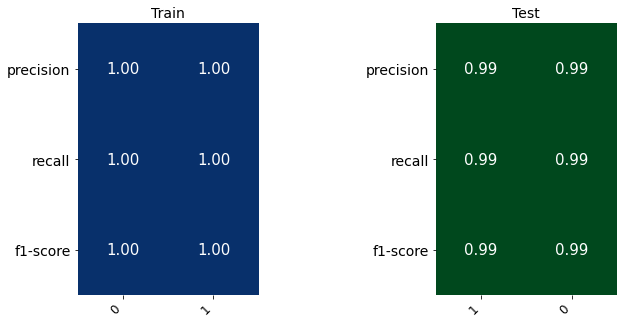

In [58]:
plot_classification_report(X_train, y_train, X_test, y_test, model)

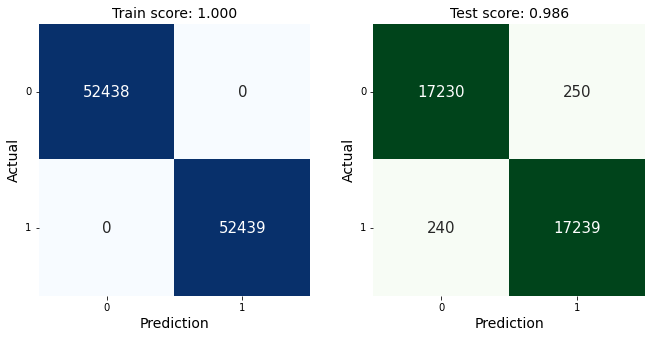

In [59]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)

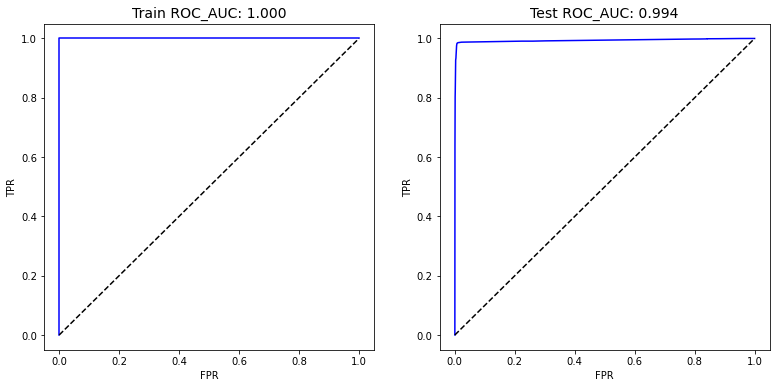

In [60]:
plot_roc_curve(X_train, y_train, X_test, y_test, model)

In [61]:
model

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median'))]),
                                                                               ['x4',
                                                                                'x10',
                                                                                'x13',
                                                                                'x15',
                                                                                'x25',
                                                                                'x28',
                                                                      

## Result Evaluation

### Berdasarkan pemodelan yang telah dilakukan, berikut output summary yang dihasilkan:

#### Metode Pemodelan: Random Forest
#### ROC-AUC
#### Train dataset = 1.000   |  Test dataset: 0.993
#### Total waktu pengolahan: 2h 27min 13s
#                             
#### Tuning: GeneticSelectionCV
#### Feature selection menghasilkan 50 parameter yang dinilai memiliki kontribusi terbaik terhadap model yang dihasilkan
#### Metode Pemodelan: Random Forest
#### ROC-AUC
#### Train dataset = 1.000   |  Test dataset: 0.994
#### Total waktu pengolahan: 38min 33s

## Implementasi model terhadap data test: findata_challenge_test.csv

In [62]:
### Import Data test

test = pd.read_csv('findata_challenge_test.csv')

In [63]:
test.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x115,x116,x117,x118,x119,x120,x121,x122,x123,x124
0,0.403735,-1.966104,-1.322339,0.084642,2.481997,-1.719155,5.0,2.0,-11.546670,-7.073770,...,3.580278,-7.765934,59.0,1.0,-9.897690,5.694125,-6.734618,17.052251,3.601040,2.873498
1,0.032128,6.516294,-0.939752,0.026937,-0.992999,5.995462,4.0,3.0,-5.634876,1.937998,...,5.783655,15.667015,47.0,1.0,7.781887,9.752716,5.918369,15.922908,5.460557,10.475816
2,-0.280345,0.930291,-1.028828,-0.050924,-3.164733,6.885108,3.0,2.0,1.609005,-1.812488,...,-0.389116,8.523648,55.0,0.0,6.815214,-3.325532,4.123546,-19.656038,8.380318,-1.203315
3,-0.313420,-0.568857,-1.576051,-0.003607,5.539969,-1.594770,4.0,3.0,-11.517734,-5.364282,...,3.930974,-13.912115,41.0,0.0,3.158137,-7.088875,-3.035983,34.277048,-3.169203,1.417681
4,0.108825,-4.815631,5.491084,-0.123928,-1.932024,4.014821,5.0,3.0,-3.117576,2.004889,...,-4.056091,-14.432712,52.0,0.0,-3.867657,-13.308519,1.008302,41.449381,-0.804560,-0.649453


In [64]:
test.shape

(25000, 125)

In [65]:
test2 = test.drop(['x89'], axis=1)

In [66]:
test2['x80'] = test2['x80'].astype(str)
test2['x93'] = test2['x93'].astype(str)

In [67]:
test_dum = pd.get_dummies(test2)
test_dum.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x112_Aug,x112_Dec,x112_Feb,x112_Jul,x112_Jun,x112_Mar,x112_May,x112_Nov,x112_Oct,x112_Sep
0,0.403735,-1.966104,-1.322339,0.084642,2.481997,-1.719155,5.0,2.0,-11.546670,-7.073770,...,1,0,0,0,0,0,0,0,0,0
1,0.032128,6.516294,-0.939752,0.026937,-0.992999,5.995462,4.0,3.0,-5.634876,1.937998,...,0,0,0,0,0,0,0,0,0,1
2,-0.280345,0.930291,-1.028828,-0.050924,-3.164733,6.885108,3.0,2.0,1.609005,-1.812488,...,1,0,0,0,0,0,0,0,0,0
3,-0.313420,-0.568857,-1.576051,-0.003607,5.539969,-1.594770,4.0,3.0,-11.517734,-5.364282,...,0,0,0,0,1,0,0,0,0,0
4,0.108825,-4.815631,5.491084,-0.123928,-1.932024,4.014821,5.0,3.0,-3.117576,2.004889,...,0,0,0,0,0,0,1,0,0,0


In [68]:
test_dum.shape

(25000, 177)

In [69]:
print(test_dum.columns.tolist())

['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x90', 'x91', 'x92', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99', 'x100', 'x101', 'x102', 'x103', 'x104', 'x105', 'x106', 'x107', 'x109', 'x110', 'x111', 'x113', 'x114', 'x115', 'x116', 'x117', 'x118', 'x119', 'x120', 'x121', 'x122', 'x123', 'x124', 'x21_Apr', 'x21_Aug', 'x21_Dec', 'x21_Feb', 'x21_Jan', 'x21_Jul', 'x21_Jun', 'x21_Mar', 'x21_May', 'x21_Nov', 'x21_Oct', 'x21_Sep', 'x79_Laki-laki', 'x79_Peremp

In [70]:
print(X_train.columns.tolist())

['x4', 'x10', 'x13', 'x15', 'x25', 'x28', 'x29', 'x32', 'x35', 'x36', 'x40', 'x46', 'x50', 'x53', 'x55', 'x59', 'x61', 'x62', 'x64', 'x66', 'x68', 'x73', 'x75', 'x78', 'x86', 'x91', 'x96', 'x99', 'x102', 'x103', 'x106', 'x109', 'x119', 'x122', 'x123', 'x21_Dec', 'x21_Jan', 'x21_Nov', 'x80_2018.0', 'x93_2002.0', 'x93_2008.0', 'x93_2016.0', 'x108_SD', 'x108_SMA/SMK', 'x108_Tidak sekolah', 'x112_Nov']


In [71]:
test_dum2 = test_dum[X_train.columns.tolist()]

In [72]:
test_res = model.predict(test_dum2)

In [73]:
test_result = pd.DataFrame(test_res, columns = ['Predicted'])

In [74]:
test_result.shape

(25000, 1)

In [75]:
test_result.index.name = 'Id'

In [76]:
test_result.head()

,Predicted
Id,
0,0
1,0
2,0
3,0
4,0


In [77]:
test_result.to_csv('Andriyan_saputra-submission.csv')